# What we're going to cover



*   Architecture of a neural network regression model
*   Input & output shapes of a regression model (features and labels/dependendent/independent variables)
*   Creating custom data to view and fit
*   Steps in modelling
    *   Creating, compiling, fitting, evaluating models
* Different evaluation methods
*   Saving and loading models




## Regression Inputs and Outputs
Predicting sale price of a house

**Inputs:** predictors, covariates, features
  *   Number of bedrooms
  *   Bathrooms
  *   Garage space

**Outputs:**
  *   Sale Price

**Numerical Encoding**
  *   e.g. 1-hot encoding

## Input & output shapes

The number of input features = shape

[bedroom, bathroom, garage]

shape = [3]

## Typical architecture of a classification neural network 

The word *typical* is on purpose.

Because the architecture of a classification neural network can widely vary depending on the problem you're working on.

However, there are some fundamentals all deep neural networks contain:
* An input layer.
* Some hidden layers.
* An output layer.

Much of the rest is up to the data analyst creating the model.

The following are some standard values you'll often use in your classification neural networks.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |

***Table 1:*** *Typical architecture of a classification network.* ***Source:*** *Adapted from page 295 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

Don't worry if not much of the above makes sense right now, we'll get plenty of experience as we go through this notebook.

Let's start by importing TensorFlow as the common alias `tf`. For this notebook, make sure you're using version 2.x+.

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


# Introduction to Regression with NEural Netowrks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables.

Predicting a number

# Creating data to view and fit

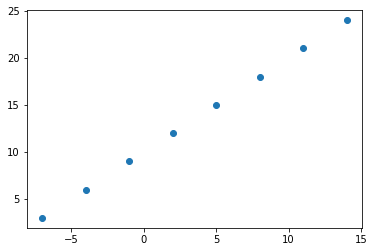

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output Shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

## OLD
# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
 
## New
# Fit the model
# model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated line

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

### Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to imporve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels)

In [ ]:
# Optionally, the first layer can receive an 'input_shape' argument:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8, input_shape=(16,)))

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(1)]
    )
# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae, # mae is short for mean absolute error
    optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
    metrics=["mae"]
              )
# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)
print('trained')


Epoch 1/5
1/1 [==============================] - 1s 771ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748
trained


In [ ]:
# Check out values for X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction

y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

## Improving our model

We can improve our model by altering the steps we took to create the model

1. **Creating a model** - we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2.  **Compiling a model** - we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [ ]:
# Let's rebuild our model

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )
              
# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)
print('trained')

In [ ]:
# Let's see if our models prediction has improved...
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [ ]:
# Write a model by yourself by changing 1 thing from the previous model

# 1. Create the model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(50, activation=None),
                             tf.keras.layers.Dense(1)
                             ])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.1),
              metrics=["mae"]
              )
              
# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=66)


In [ ]:
model.predict([17.0])

array([[25.403008]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building a neural network is:

```
Build a model > fit it > evaluate it > tweak a model > repeat...
```

When it comes to evaluation... there are 3 words you should memorize:
> "Visualize, visualize, visualize"

## Vizualize:
* **The data** - What data are we woring with and what does it look like?
* **The model** - What does our model look like?
* **Training the model** - How does a model perform while it learns?
* **Predictions** - How do the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
# Make a bigger dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

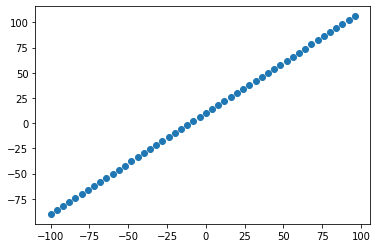

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 Sets

* Training set - the model learns from this data, which is typically 70-80% of the total data you have available.
* Validation set - the model gets tuned on this data, 10-15%
* Test set - the model gets evaluated on this data to test what it has learned, 10-15%

In [ ]:
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

X_train, y_train, X_test, y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

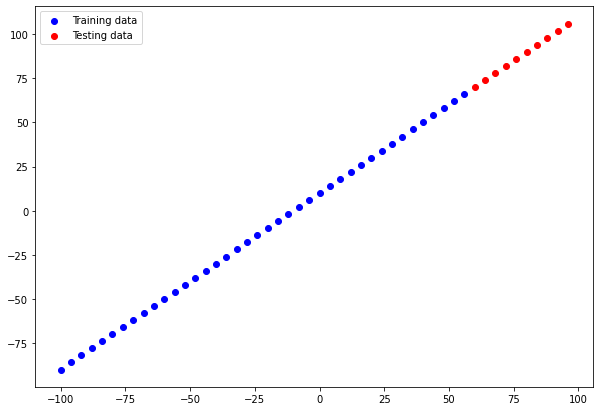

In [ ]:
### Visualizing the data

plt.figure(figsize=(10, 7))
# plot training in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# plot testing in red
plt.scatter(X_test, y_test, c="r", label="Testing data")
# show a legend
plt.legend()


In [ ]:
# Lets build a network for our data
# 1. Create a model
tf.random.set_seed(42)
model = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
     tf.keras.layers.Dense(1, name="output_layer"), 
    ], name="model_1"
)

# 2. Compile the model
model.compile(loss="mae", optimizer="sgd", metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)


In [ ]:
### Visualizing the model
# model.build()

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during the training (this is typical when you bring in already learned patterns or parameters from other models during **transfer learning**)

📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.

🔧 **Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by callling `model.summary()`

In [ ]:
# Let's fit our model to the training data
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [ ]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


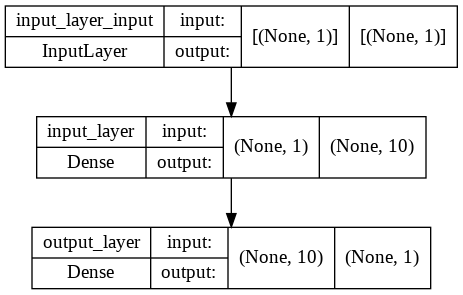

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing model predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test or y_true vs y_pred (ground truth vs your model's predictions).

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

# Let's create a plotting function

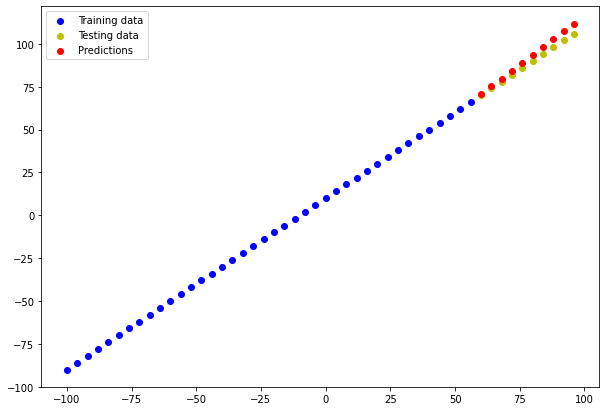

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # plot training in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # plot testing in yellow
  plt.scatter(test_data, test_labels, c="y", label="Testing data")
  # plot predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # show a legend
  plt.legend()

plot_predictions()


### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [ ]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 158ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [ ]:
# Calculate the mean absolute error
print(tf.shape(y_pred), tf.shape(y_test))
mae = tf.keras.metrics.MeanAbsoluteError()
mae.reset_state()
mae.update_state(y_test, tf.squeeze(y_pred))
mae.result().numpy()


tf.Tensor([10  1], shape=(2,), dtype=int32) tf.Tensor([10], shape=(1,), dtype=int32)


3.1969407

In [ ]:
# Calculate the mean square error
mse = tf.keras.metrics.MeanSquaredError()
mse.reset_state()
mse.update_state(y_test, tf.squeeze(y_pred))
mse.result().numpy()

13.070143

In [ ]:
# Make some functions to reuse mae and mse (not necessary)
def mae(y_true, y_pred):
  mae = tf.keras.metrics.MeanAbsoluteError()
  mae.reset_state()
  mae.update_state(y_true, tf.squeeze(y_pred))
  return mae.result().numpy()

def mse(y_true, y_pred):
  mse = tf.keras.metrics.MeanSquaredError()
  mse.reset_state()
  mse.update_state(y_true, tf.squeeze(y_pred))
  return mse.result().numpy()

mae(y_test, y_pred), mse(y_test, y_pred)

(3.1969407, 13.070143)

### Running experiments to improve our model

```
Build :> Fit > Eval. > Tweak > repeat
```
"Experiment, Experiment, Experiment"

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).

2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.

3. Train for longer - give your model more of a chance to find patterns in the data.


3 Modeling Experiments

1. `model_1` - same as original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs


In [ ]:
# 1. model_1
tf.random.set_seed(42)
model_1 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(1),
    ], name="model_1"
)

# 2. Compile the model
model_1.compile(loss="mae", optimizer="sgd", metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)


(18.745327, 353.57336)

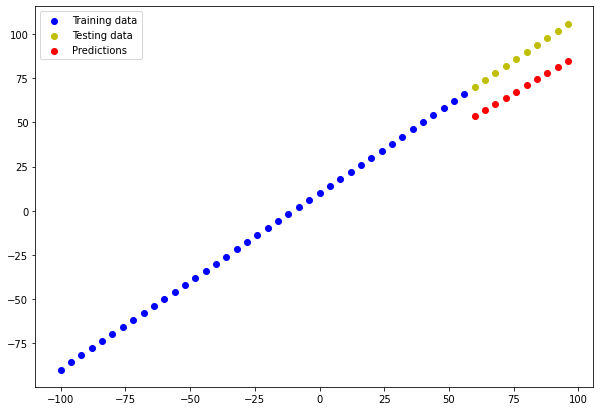

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

In [ ]:
# 1. Build model_2
tf.random.set_seed(42)
model_2 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1),
    ], name="model_2"
)

# 2. Compile the model
model_2.compile(loss="mae", optimizer="sgd", metrics=["mae", "mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

(3.1969407, 13.070143)

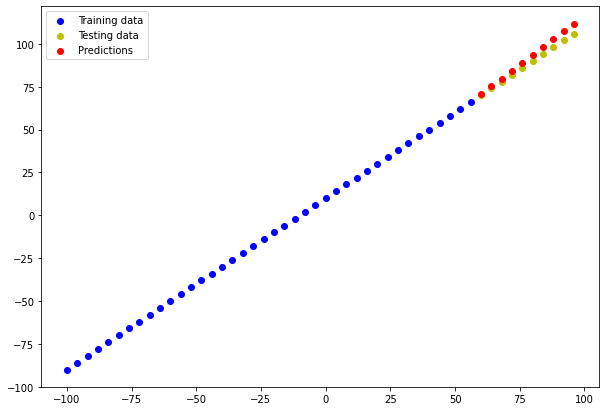

In [ ]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

In [ ]:
# 1. Build model_3
tf.random.set_seed(42)
model_3 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1),
    ], name="model_3"
)

# 2. Compile the model
model_3.compile(loss="mae", optimizer="sgd", metrics=["mae", "mse"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

(68.713615, 4808.0273)

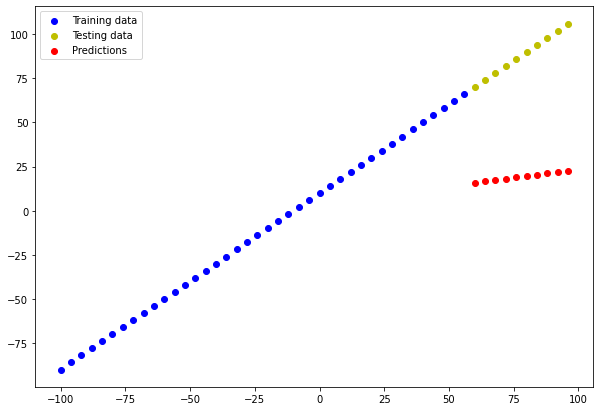

In [ ]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

### Comparing Results

🔑 **Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.


In [ ]:
# Compare model results using pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1, mse_1],["model_2", mae_2, mse_2],["model_3", mae_3, mse_3]]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


In [ ]:
print(model_1.summary(), "\n\n", model_2.summary(), "\n\n", model_3.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Model: "model_3"
___________________________________

**Note:** One of the main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work.

Machine learning practitioner's motto: "*Experiment, Experiment, Experiment*"

One really good habit in ML modelling is to track the results of your experiments.

When doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help.

**Resource:** As you build more models, you'll want to look into using"

* [**TensorBoard**](https://www.tensorflow.org/tensorboard) - a component of the TensorFlow library to help track modelling experiments
* [**Weights & Biases**](https://wandb.ai/site) - a tool for tracking all kinds of ML experiments (plugs straight into TensorBoard)


### Saving our Models

Allows us to use them outside of Google Colab (or wherever they were trained) such as in a web or mobile app.

In [ ]:
# Save using hdf5 format
model_1.save('model_1.h5')
model_2.save('model_2.h5')
model_3.save('model_3.h5')

# Load
loaded_model_1 = tf.keras.models.load_model('model_1.h5')
loaded_model_2 = tf.keras.models.load_model('model_2.h5')
loaded_model_3 = tf.keras.models.load_model('model_3.h5')

# Compare model predictions with saved predictions
model_2_preds = model_2.predict(X_test)
loaded_2_preds = loaded_model_2.predict(X_test)
model_2_preds == loaded_2_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to dl your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download"

2. Use code (see cell below)

3. Save it to Google Drive by connecting and copying it

In [ ]:
# Download via code
from google.colab import files
# files.download("/content/model_3.h5")

# files.download("/content/model_2.h5")

# files.download("/content/model_1.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# First mnt google drive connection
# Save a file from Colab to Drive 
# !cp /content/model_1.h5 /content/drive/MyDrive/tensorflow_course

# A Larger Example

In [1]:
# Import required libs
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance[:10]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Dependent variables: charges
Independent variables: age, sex, bmi, children, smoker, region

In [3]:
# pd.get_dummies automcatically one_hot encodes appropriate columns
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [4]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]
X.head(), y.head()


(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0           1         0          0           1   
 1   18  33.770         1           0         1          1           0   
 2   28  33.000         3           0         1          1           0   
 3   33  22.705         0           0         1          1           0   
 4   32  28.880         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

In [5]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)
# Create a model
insurance_model = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
    ]
)
# Compile
insurance_model.compile(loss="mae", optimizer="sgd", metrics=["mae"])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

In [ ]:
# Evaluate results of insurance model on test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

## Right now it looks like our model isn't performing too well...l let's try to improve it

In [31]:
tf.random.set_seed(42)
insurance_model_adam = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
    ]
)
# insurance_model_nadam = tf.keras.Sequential(
#     [
#      tf.keras.layers.Dense(100),
#      tf.keras.layers.Dense(10),
#      tf.keras.layers.Dense(1)
#     ]
# )
# Compile
insurance_model_adam.compile(loss="mae", optimizer="adam", metrics=["mae"])
# insurance_model_nadam.compile(loss="mae", optimizer="nadam", metrics=["mae", "mse"])
# Fit the model
history_adam = insurance_model_adam.fit(X_train, y_train, epochs=200, verbose=0)
# history_nadam = insurance_model_nadam.fit(X_train, y_train, epochs=200, verbose=0)
# Evaluate results of insurance model on test data
# insurance_model_adam.evaluate(X_test, y_test)

# What are Optimizers?
Optimizers define how neural networks learn

They find the values of paramaters such that a loss function is at it's lowest.

**Types**

**Gradient Descent (GD):** Takes small steps iteratively until we reach the correct weights.  The weight is only updated once after seeing the entire dataset.

**Stochastic Gradient Descent (SGD):** Updates weights after seeing each datapoint instead of the whole dataset.  This makes very noisy jumps that can go away from the optimal value.

**Mini-Batch Gradient Descent (MBGD):** Updates weights after a few sample datapoints instead of individual.

**SGD + Momentum:** Ignores datapoints that don't follow the momentum of other datapoints.  Can learn faster but can also overshoot.

**SGD + Momentum + Acceleration:** When unusual datapoints occur, the model deccelerates and readjusts so it doesn't overshoot.  Using multiple parameters is not ideal as the learning rate is fixed across the board.

**Adaptive Gradient Algorithm (AdaGrad):** Gradient-based optimization. The learning rate is adapted component-wise to the parameters by incorporating knowledge of past observations. As iterations go on, the learning rate is decreased

**AdaDelta:** A more robust extension of Adagrad that adapts learning rates based on a moving window of gradient updates, instead of accumulating all past gradients. This way, Adadelta continues learning even when many updates have been done.

**Adam:** AdaDelta + expected value of past gradients (momentum).  Slow initially, but pick up speed over time.

**NAdam:** Adam + acceleration.


Text(0.5, 0, 'epochs')

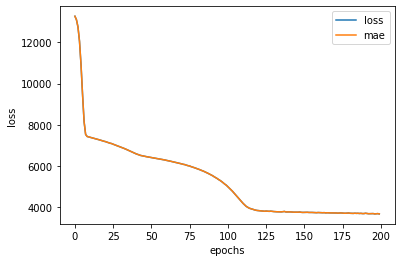

In [32]:
# plot history (also known as a loss curve or training curve)
pd.DataFrame(history_adam.history).plot()
# pd.DataFrame(history_nadam.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")


# Early Stopping
**Question:** How long should you train for?

It depends on the problem you're working on.  TensorFlow as created a solution called EarlyStopping Callback.

It is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
tf.random.set_seed(42)
insurance_model_early_stopping = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
    ]
)
# Compile
insurance_model_early_stopping.compile(loss="mae", optimizer="adam", metrics=["mae"])
# Fit the model
history_early_stopping = insurance_model_early_stopping.fit(X_train, y_train, epochs=200, callbacks=[callback])

Text(0.5, 0, 'epochs')

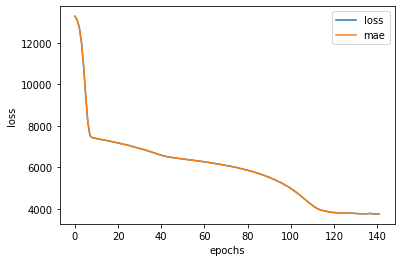

In [30]:
# plot history (also known as a loss curve or training curve)
pd.DataFrame(history_early_stopping.history).plot()
# pd.DataFrame(history_nadam.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")


# Preprocessing data (normalization and standardization)

The goal is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the range of values. 

Many ML algos perform better or converge faster when features are on a relatively similar scale and/or close to normally distributed.

**Example Algorithm Families:**
* Linear and logistic regression
* Nearest neighbors
* Neural networks
* Support vector machines with radial bias kernel functions
* Principal components analysis
* Linear discriminant analysis

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in insurance df
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


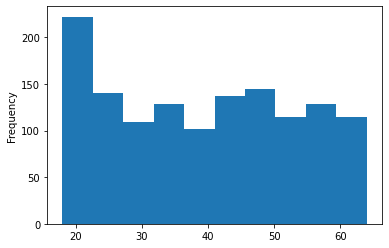

In [35]:
X["age"].plot(kind="hist")

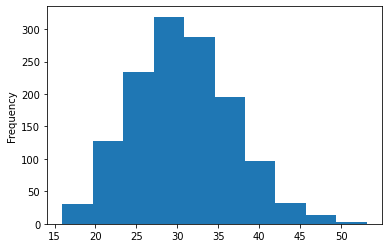

In [38]:
X["bmi"].plot(kind="hist")

In [40]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

# Scaling
<table >
  <tr>
    <th>Scaling Type</th>
    <th>What it does</th>
    <th>Scikit-Learn Function</th>
    <th>When to use</th>
  </tr>
  <tr>
    <td class="data">Scale (normalization)</td>
    <td class="data">Converts all values to between 0 and 1 whilst preserving the original distribution.</td>
    <td class="data">MinMaxScaler</td>
    <td class="data">Use as default scaler with neural networks.</td>
  </tr>
  <tr>
    <td>Standardization</td>
    <td>Removes the mean and divides each value by the standard deviation.</td>
    <td>StandardScaler</td>
    <td>Transform a feature to have close to normal distribution (caution: this reduces the effect of outliers).</td>
  </tr>
</table>


In [67]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]) # convert these text columns to one hot encoded
)

# Create X & y
X = insurance.drop('charges', axis=1)
y = insurance['charges']

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)



In [68]:
# View data
X_train.loc[0], X_train_normal[0]

(age                19
 sex            female
 bmi              27.9
 children            0
 smoker            yes
 region      southwest
 Name: 0, dtype: object,
 array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]))

In [46]:
# Check shape
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Data has been normalized and one hot encoded.
Now let's build a neural network model on it.

In [75]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)
# Instantiate the model
normalized_model = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1),
    ]
)

# Compile the model
normalized_model.compile(loss="mae", optimizer="adam", metrics=["mae"])

# Fit the model
normalized_history = normalized_model.fit(X_train_normal, y_train, epochs=100, verbose=0)

In [77]:
# Compare it to unprocesses data
# Create X and y values (features and labels)
X_unprocessed = insurance_one_hot.drop("charges", axis=1)
y_unprocessed = insurance_one_hot["charges"]
# Split unprocessed datasets
X_train_unprocessed, X_test_unprocessed, y_train_unprocessed, y_test_unprocessed = train_test_split(X_unprocessed, y_unprocessed, test_size=0.2, random_state=42)
tf.random.set_seed(42)
# Instantiate Model
unprocessed_model = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
    ]
)
# Compile
unprocessed_model.compile(loss="mae", optimizer="adam", metrics=["mae"])
# Fit the model
unprocessed_history = unprocessed_model.fit(X_train_unprocessed, y_train_unprocessed, epochs=100, verbose=0)

In [78]:
# Evaluate the model
normalized_results = normalized_model.evaluate(X_test_normal, y_test)
unnormalized_results = unprocessed_model.evaluate(X_test_unprocessed, y_test_unprocessed)
print(normalized_results, '\n\n', unnormalized_results)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477
[3438.784423828125, 3438.784423828125] 

 [4924.34765625, 4924.34765625]
